## Task 1

In [1]:
from keras import datasets
import numpy as np
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from numpy.random import default_rng as rng
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
def load_dataset():

    #rng = default_rng()
    #encoder = OneHotEncoder()
    #encoder2= OneHotEncoder()

    data = datasets.mnist.load_data()

    (X_train, y_train), (X_test, y_test) = data

    #print(datasets.mnist.load_data())

    X_train = X_train / 255
    X_test = X_test / 255

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    X_train = np.reshape(X_train, [60000, 28 * 28])
    X_test = np.reshape(X_test, [10000, 28 * 28])

    #encoder = encoder.fit_transform(y_train.reshape(1, -1))
    #encoder2= encoder2.fit_transform(y_test.reshape(1, -1))
    #y_train = np.reshape(y_train, [60000, 1])
    #y_test = np.reshape(y_test, [10000, 1])

    print(X_train[0])
    print(y_test)

    print(y_train.shape)
    
    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = load_dataset()

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [55]:
class Activation_Layer_ReLU:
    
    def forward_pass(self, x):
        
        self.x = x
        
        return np.maximum(0, x)
    
    def backward_pass(self, dvalues):
        
        self.d_relu = dvalues.copy()
        
        self.d_relu[self.x <= 0] = 0
        
        return self.d_relu
        
        #return (x > 0) * 1
        
        #return np.greater(x, 0).astype(int)
        

In [56]:
class Activation_Layer_Sigmoid:
    
    def forward_pass(self, x):
        
        #print("TEST 2")
        self.sigmoid = 1 / (1 + np.exp(-x))
        
        return self.sigmoid
    
    def backward_pass(self, dvalues):
        
        #print("Test")
        
        return self.sigmoid * (1 - self.sigmoid)
        #return self.forward_pass(dvalues) * (1 - self.forward_pass(dvalues))


In [57]:
class Activation_Layer_Softmax:
    
    def forward_pass(self, x):
        
        exponents = np.exp(x - np.max(x, axis = 1, keepdims = True))
        
        self.softmax_out = exponents / np.sum(exponents, axis = 1, keepdims = True)
        
        return self.softmax_out
    
    def backward_pass(self, dvalues):
        
        #softmax = self.softmax(x)
        
        #return np.diag(softmax) + (softmax * softmax.reshape(14000, 784))
        
        """print("DV:", dvalues.shape)
        
        jacobian = dvalues[:, :, None] * dvalues[:, None, :]
        #print("Jaco", jacobian.shape)
        
        iy, ix = np.diag_indices_from(dvalues)
        jacobian[:, iy, ix] = dvalues * (1.0 - dvalues)
        
        self.dinputs = np.sum(jacobian, axis = 1)"""
        
        self.dinputs = np.empty_like(dvalues) # Create empty array same size as input gradients
        
        #print(self.softmax_out.shape)
        
        for idx, (single_output, single_dvalue) in enumerate(zip(self.softmax_out, dvalues)):
            
            single_output = single_output.reshape(-1, 1) # Flatten output
            
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T) # Create a jacobian matrix for each output 
            
            self.dinputs[idx] = np.dot(jacobian_matrix, single_dvalue) # Calculate sample-wise gradients
        
        #print("D_SF", self.dinputs.shape)
        
        return self.dinputs
    
        """#d_vector = dvalues.flatten()
        #d_matrix = np.tile(dvalues, dvalues.shape[1])
        
        #test = np.diag(dvalues) - np.dot(d_matrix, d_matrix.T)
        
        #print("TEST:", test)
        
        s_max = self.softmax_out.copy()
        
        si_sj = np.dot(self.softmax_out.flatten(), self.softmax_out.flatten().T)
        
        print("AAAAAAAAAAAAAAAAAA", self.softmax_out.T.flatten().shape)
        
        #print(s)
        print("PPPPPPPPPPPPP", si_sj.shape)
        s_der = np.diag(self.softmax_out.flatten()) - si_sj
        print("S_DER", np.diag(self.softmax_out).shape)
        
        #s = self.softmax_out.reshape(-1, 1)
        
        #self.dinputs = np.diagflat(s) - np.dot(s, s.T)
        self.test = s_der
        
        print("######", self.test.shape, self.dinputs.shape)"""


In [58]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        
        #self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        #self.weights = np.random.normal(size = (n_inputs, n_neurons))
        
        self.weights = (np.random.randn(n_inputs, n_neurons) * np.sqrt(2/n_neurons)) #He Initialisation
        #self.weights = (np.random.normal(loc = 0, scale = 0.5, size = (n_inputs, n_neurons)) * np.sqrt(2/n_neurons)) #He Initialisation
        #self.weights = np.random.uniform(-1.0, 1.0, size = (n_inputs, n_neurons))
        #self.biases = np.zeros((1, n_neurons))
        self.biases = 0.01 * (np.random.randn(1, n_neurons))
        
        #print(self.weights)

    def forward_pass(self, x):
        
        self.x = x
        
        return np.dot(x, self.weights) + self.biases
    
    def backward_pass(self, dvalues):
        
        #print(self.x, dvalues.shape)
        
        N = len(self.x)
        
        self.dweights = (1/N) * np.dot(self.x.T, dvalues)
        self.dbiases = (1/N) * np.sum(dvalues, axis = 0, keepdims = True)
        self.dinputs = (1/N) * np.dot(dvalues, self.weights.T)
        
        #self.dinputs = np.dot(dvalues, self.weights.T) * (1 - np.power(np.maximum(0, self.x), 2))
        
        #print("dIN", self.dinputs.shape)
        
        return self.dinputs

In [59]:
class Loss:
    
    def calculate_mean_loss(self, y_pred, y_true):
        
        #mean_loss = np.mean(self.forward_propogation(y_pred, y_true))
        mean_loss = self.forward_propogation(y_pred, y_true)
        
        return mean_loss
        

In [60]:
class Loss_Cross_Entropy(Loss):
    
    def forward_propogation(self, y_pred, y_true):
        
        N = len(y_pred)
        
        """if len(y_true.shape) == 1:
            
            #print("A:", y_pred.shape, y_true.shape, range(samples))
            
            confidence = y_pred[range(N), y_true]
        
        elif len(y_true.shape) == 2:
            
            confidence = np.sum(y_pred * y_true, axis = 1)
            
        neg_log_likelihood = np.mean(-np.log(confidence))"""
        
        #neg_log_likelihood = - np.sum(np.dot(y_true, np.log(y_pred)))
        #-sum([p[i]*log(q[i])
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        #neg_log_likelihood = np.mean((-1/N) * (np.sum(y_true * np.log(y_pred), axis = 1)))
        
        #neg_log_likelihood = np.mean(-np.log((-1) * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))))
        
        #neg_log_likelihood = np.mean((1/N) * -np.sum(np.log(y_pred_clipped) * y_true + np.log(1 - y_pred_clipped) * (1 - y_true), axis = 1))
        
        neg_log_likelihood = np.mean(-np.sum(y_true * np.log(y_pred_clipped), axis = 1))
        
        return neg_log_likelihood
     
    def backward_propogation(self, dvalues, y_true):
        
        N = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = (-y_true / dvalues)
        self.dinputs = self.dinputs / N

        return self.dinputs
        

In [61]:
class Activation_Softmax_Layer_Loss_Cross_Entropy:
    
    def __init__(self):
        self.activation = Activation_Layer_Softmax()
        self.loss = Loss_Cross_Entropy()
        
    def forward_pass(self, x, y_true):
        
        self.softmax_output = self.activation.forward_pass(x)
        self.mean_loss = self.loss.calculate_mean_loss(self.softmax_output, y_true)
        
        return self.softmax_output
        
    def backward_pass(self, dvalues, y_true):
        
        N = len(dvalues)
        
        """if len(y_true.shape) == 2:
            
            y_true = np.argmax(y_true, axis = 1)
            
        self.dinputs = dvalues.copy()
        
        self.dinputs[range(N), y_true] -= 1
        
        self.dinputs = (1/N) * self.dinputs
        
        if len(y_true.shape) == 2:
            
            y_true = np.argmax(y_true, axis = 1)"""
        
        #print("SF", self.softmax_output.T, y_true.shape)
        
        self.dinputs = (1/N) * ((self.softmax_output) * self.activation.backward_pass(dvalues))
        
        #print(self.dinputs.shape)
        
        return self.dinputs
    

In [62]:
class Optimiser_SGD:
    
    def __init__(self, learning_rate = 0.5, decay = 0, momentum = 0):
        
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
    
    def update_learning_rate(self): #Learning rate decay
        
        if self.decay:
            
            self.current_learning_rate = self.learning_rate * (1/(1 + self.decay * self.iterations))
    
    def update_iterations(self):
        
        self.iterations += 1
    
    def update_values(self, layer):
        
        if self.momentum:
            
            if not hasattr(layer, "weight_momentum"):
                
                layer.weight_momentum = np.zeros_like(layer.weights)
                layer.bias_momentum = np.zeros_like(layer.biases)
                
            new_weights = (self.momentum * layer.weight_momentum) - (self.current_learning_rate * layer.dweights)
            layer.weight_momentum = new_weights
            
            new_biases = (self.momentum * layer.bias_momentum) - (self.current_learning_rate * layer.dbiases)
            layer.bias_momentum = new_biases
            
        else:
            
            new_weights -= self.learning_rate * layer.dweights
            new_biases -= self.learning_rate * layer.dbiases
        
        layer.weights += new_weights
        layer.biases += new_biases
        
        """#print("A")
        #print(layer.weights)
        
        #print("####################################")
        #print(layer.dweights)
        
        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases
        
        #print("B")
        #print(layer.weights)"""
        
        #return layer.weights, layer.biases
        

In [63]:
from sklearn.utils import shuffle

class Optimiser_Mini_Batch_GD:
    
    def __init__(self, learning_rate = 0.5, batch_size = 32):
        
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        
    def generate_batches(self, X, y):
        
        mini_batches = []
        
        X, y = shuffle(X, y)
        
        for idx in range(0, X.shape[0], self.batch_size):
            
            X_batch = X[idx:idx + self.batch_size]
            y_batch = y[idx:idx + self.batch_size].reshape(-1, 1)
        
        mini_batches.append((X_batch, y_batch))
        
        return mini_batches
        
        """mini_batches = []
        data = np.vstack((X.T, y.T))
        np.random.shuffle(data)
        
        n_batches = data.shape[0] // self.batch_size
        
        idx = 0
        
        for idx in range(n_batches + 1):
            
            mini_batch = data[idx * batch_size:(idx + 1) * batch_size, :]
            
            X_batch = mini_batch[:, :-1]
            y_batch = mini_batch[:, :-1].reshape((-1, 1))
            
            mini_batches.append((X_batch, y_batch))
            
        if data.shape[0] % batch_size != 0:
                
            mini_batch = data[idx * batch_size:data.shape[0]]
                
            X_batch = mini_batch[:, :-1]
            y_batch = mini_batch[:, :-1].reshape((-1, 1))
            
            mini_batches.append((X_batch, y_batch))
            
        return mini_batches"""
        
        """mini_batches = []
        #data = np.vstack((X.T, y.T))
        #np.random.shuffle(data)
        
        X, y = shuffle(X, y)
        
        n_batches = X.shape[0] // self.batch_size
        
        idx = 0
        
        for idx in range(n_batches + 1):
            
            #mini_batch = data[idx * batch_size:(idx + 1) * batch_size, :]
            
            X_batch = X[idx * self.batch_size:(idx + 1) * self.batch_size, :]
            y_batch = y[idx * self.batch_size:(idx + 1) * self.batch_size, :].reshape((-1, 1))
            
            mini_batches.append((X_batch, y_batch))
            
        if X.shape[0] % batch_size != 0:
                
            #mini_batch = data[idx * batch_size:data.shape[0]]
                
            X_batch = X[idx * self.batch_size:X.shape[0]]
            y_batch = y[idx * self.batch_size:y.shape[0]].reshape((-1, 1))
            
            mini_batches.append((X_batch, y_batch))
            
        return mini_batches"""
    
    def mini_batch_gradient_descent(self, X, y, layer):
        
        #error_list = []
        
        mini_batches = self.generate_batches(X, y)
        
        for batch in mini_batches:
            
            x_batch, y_batch = batch
            
            layer.weights -= self.learning_rate * layer.dweights
            layer.biases -= self.learning_rate * layer.dbiases
            

In [64]:
class NeuralNetwork:
    
    def __init__(self, learning_rate, batch_size, epochs, input_layer_size, output_layer_size, hidden_layer_size):
        
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.input_layer_size = input_layer_size
        self.output_layer_size = output_layer_size
        self.hidden_layer_size = hidden_layer_size
        
        self.loss_history = []
        self.accuracy_history = []
    
    def fit(self, X, y):
        
        X_train = X
        y_train = y

        dense_layer1 = Layer_Dense(X_train.shape[1], self.hidden_layer_size)

        activation_layer1 = Activation_Layer_ReLU()
        
        dense_layer2 = Layer_Dense(self.hidden_layer_size, self.hidden_layer_size)
        
        activation_layer2 = Activation_Layer_Sigmoid()
        
        dense_layer3 = Layer_Dense(self.hidden_layer_size, self.output_layer_size)
        
        activation_layer3 = Activation_Layer_Softmax()
        
        #loss_function = Loss_Cross_Entropy()
        
        loss_activation = Activation_Softmax_Layer_Loss_Cross_Entropy()
        
        optimiser = Optimiser_SGD(learning_rate = self.learning_rate, decay = 0.001, momentum = 0.9)
        #optimiser = Optimiser_Mini_Batch_GD(learning_rate = self.learning_rate, batch_size = self.batch_size)
        
        for iteration in range(self.epochs):

            #print("ReLU")
            dense_layer1_forward = dense_layer1.forward_pass(X_train)    
            activation_layer1_forward = activation_layer1.forward_pass(dense_layer1_forward)

            #print(X_train.shape, dense_layer1_forward.shape, activation_layer1_forward.shape)

            #print("Sig")
            dense_layer2_forward = dense_layer2.forward_pass(activation_layer1_forward)
            activation_layer2_forward = activation_layer2.forward_pass(dense_layer2_forward)

            #print(activation_layer1_forward)

            #print("Soft")
            dense_layer3_forward = dense_layer3.forward_pass(activation_layer2_forward)
            #activation_layer3_forward = activation_layer3.forward_pass(dense_layer3_forward)

            #print(y_test.shape)

            #print(activation_layer3_forward)

            #print("Loss")
            #loss = loss_function.calculate_mean_loss(activation_layer3_forward, y_train)

            activation_layer3_forward = loss_activation.forward_pass(dense_layer3_forward, y_train)

            loss = loss_activation.mean_loss

            #print("Loss:", loss)
            
            self.test_y_pred = activation_layer3_forward.copy()
            self.test_y_true = y_train.copy()

            y_pred = np.argmax(activation_layer3_forward, axis = 1)
            y_valid = np.argmax(y_train, axis = 1)

            #accuracy = np.mean(y_pred == y_valid)
            accuracy = accuracy_score(y_valid, y_pred)

            #print("Accuracy:", accuracy)

            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            if iteration % 1 == 0:

                print("iteration:", iteration, "loss:", loss, "acc:", accuracy)#, "lr:", optimiser.current_learning_rate)


            #Backward Pass

            #print("Soft Back")
            #loss_activation_backward = loss_function.backward_propogation(activation_layer3_forward, y_train)
            loss_activation_backward = loss_activation.backward_pass(activation_layer3_forward, y_train)

            #activation_layer3_backward = activation_layer3.backward_pass(loss_activation_backward, activation_layer3_forward)    
            dense_layer3_backward = dense_layer3.backward_pass(loss_activation_backward)

            #print("Sig Back")
            activation_layer2_backward = activation_layer2.backward_pass(dense_layer3_backward)
            dense_layer2_backward = dense_layer2.backward_pass(activation_layer2_backward)

            #print("ReLU Back")
            activation_layer1_backward = activation_layer1.backward_pass(dense_layer2_backward)    
            dense_layer1.backward_pass(activation_layer1_backward)

            #print(dense_layer1.weights.shape)

            #dense_layer3_backward = dense_layer3.backward_pass(loss_function.calculate_mean_loss(activation_layer3_forward, y_train), y_train)

            #print("BEFORE")
            #print(dense_layer1.weights)

            #old_weights = dense_layer1.weights.copy()

            #dense_layer1.set_weights(optimiser.update_values(dense_layer1)[0])

            """optimiser.mini_batch_gradient_descent(X_train, y_train, dense_layer1)
            optimiser.mini_batch_gradient_descent(X_train, y_train, dense_layer2)
            optimiser.mini_batch_gradient_descent(X_train, y_train, dense_layer3)"""

            optimiser.update_learning_rate() # For learning rate decay

            optimiser.update_values(dense_layer1)
            optimiser.update_values(dense_layer2)
            optimiser.update_values(dense_layer3)

            optimiser.update_iterations()


            """if iteration % 50 == 0:

                print("iteration:", iteration, "loss:", loss, "acc:", accuracy)

            #if iteration % 250 == 0:
            loss_history.append(loss)
            accuracy_history.append(accuracy)


            """
            
        print("iteration:", iteration, "loss:", loss, "acc:", accuracy)
        
        
    def get_histories(self):
        
        return loss_history, accuracy_history, epochs
        

In [65]:
network = NeuralNetwork(learning_rate = 0.001, batch_size = 32, epochs = 50, 
                        input_layer_size = X_train.shape[1], hidden_layer_size = 150, output_layer_size = 10)

In [66]:
network.fit(X_train, y_train)

iteration: 0 loss: 3.4632668193875857 acc: 0.12348333333333333
iteration: 1 loss: 3.458811644516703 acc: 0.12318333333333334
iteration: 2 loss: 3.450355186803531 acc: 0.12323333333333333
iteration: 3 loss: 3.438307741271956 acc: 0.12305
iteration: 4 loss: 3.4230392028402736 acc: 0.1227
iteration: 5 loss: 3.4048837867019888 acc: 0.12206666666666667
iteration: 6 loss: 3.384146501408767 acc: 0.12158333333333333
iteration: 7 loss: 3.361111236245265 acc: 0.12073333333333333
iteration: 8 loss: 3.336049878867041 acc: 0.1193
iteration: 9 loss: 3.309231439104606 acc: 0.11828333333333334
iteration: 10 loss: 3.2809298139243706 acc: 0.1171
iteration: 11 loss: 3.251428688964192 acc: 0.1155
iteration: 12 loss: 3.2210222284552175 acc: 0.1136
iteration: 13 loss: 3.190010719166513 acc: 0.11161666666666667
iteration: 14 loss: 3.1586911987959674 acc: 0.11013333333333333
iteration: 15 loss: 3.1273442013462613 acc: 0.10903333333333333
iteration: 16 loss: 3.096218845961219 acc: 0.10835
iteration: 17 loss: 3

In [71]:
import pandas as pd
from sklearn.metrics import f1_score

pd.options.display.max_seq_items = 100

x = np.argmax(network.test_y_pred, axis = 1)
y = np.argmax(network.test_y_true, axis = 1)

#print("X\n")
#print([*x])

#print("Y\n")
#print([*y])

#print(np.mean(x == y))

print(f1_score(y, x, average='macro'))

0.05308832266779612


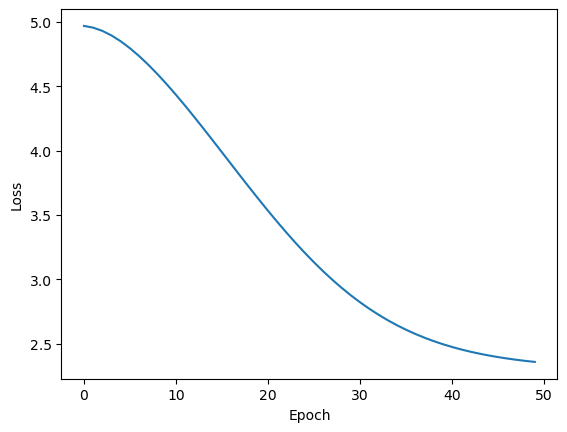

In [53]:
#loss_history, accuracy_history, epochs = network.get_histories()

plt.plot(range(int(network.epochs)), network.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

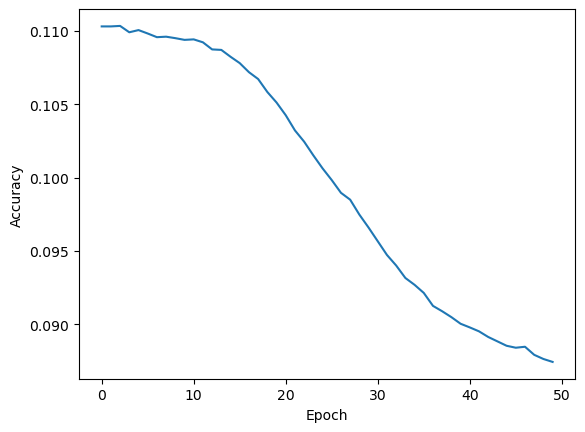

In [54]:
plt.plot(range(int(network.epochs)), network.accuracy_history)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [535]:
print(y_pred)

print("TRAIN")
print(y_train)

print(np.mean(y_pred == y_train))

[0 0 0 ... 0 0 0]
TRAIN
[5 0 4 ... 5 6 8]
0.10533333333333333


In [523]:
print(activation_layer3_forward)

[[1.66666667e-06 1.66666667e-06 1.66666667e-06 ... 1.66666667e-06
  1.66666667e-06 1.66666667e-06]
 [1.66666667e-06 1.66666667e-06 1.66666667e-06 ... 1.66666667e-06
  1.66666667e-06 1.66666667e-06]
 [1.66666667e-06 1.66666667e-06 1.66666667e-06 ... 1.66666667e-06
  1.66666667e-06 1.66666667e-06]
 ...
 [1.66666667e-06 1.66666667e-06 1.66666667e-06 ... 1.66666667e-06
  1.66666667e-06 1.66666667e-06]
 [1.66666667e-06 1.66666667e-06 1.66666667e-06 ... 1.66666667e-06
  1.66666667e-06 1.66666667e-06]
 [1.66666667e-06 1.66666667e-06 1.66666667e-06 ... 1.66666667e-06
  1.66666667e-06 1.66666667e-06]]


In [48]:
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 12.739091058244902
Accuracy: 0.4186166666666667


## -----------------------------------------------------------------------------------------------------------------------------

In [235]:
dense_layer1_forward = dense_layer1.forward_pass(X_train)

#print(X_train.shape[1])
#print(dense_layer1_forward.shape)

activation_layer1_forward = activation_layer1.forward_pass(dense_layer1_forward)

dense_layer2_forward = dense_layer2.forward_pass(activation_layer1_forward)

activation_layer2_forward = activation_layer2.forward_pass(dense_layer2_forward)

dense_layer3_forward = dense_layer3.forward_pass(activation_layer2_forward)

activation_layer3_forward = activation_layer3.forward_pass(dense_layer3_forward)

#print(y_test.shape)

print(activation_layer3_forward)

loss = loss_function.calculate_mean_loss(activation_layer3_forward, y_train)

print("Loss:", loss)

[[1.67590275e-06 1.65152065e-06 1.65721082e-06 ... 1.65715403e-06
  1.67848615e-06 1.67018360e-06]
 [1.67588782e-06 1.65155903e-06 1.65721330e-06 ... 1.65719159e-06
  1.67850166e-06 1.67018850e-06]
 [1.67591281e-06 1.65160950e-06 1.65722753e-06 ... 1.65719984e-06
  1.67855277e-06 1.67021450e-06]
 ...
 [1.67591354e-06 1.65152998e-06 1.65723682e-06 ... 1.65715801e-06
  1.67850356e-06 1.67018524e-06]
 [1.67590307e-06 1.65158943e-06 1.65719749e-06 ... 1.65718721e-06
  1.67852821e-06 1.67022410e-06]
 [1.67589272e-06 1.65154629e-06 1.65720792e-06 ... 1.65716691e-06
  1.67847822e-06 1.67018461e-06]]
Loss: 13.304818431623891


In [236]:
predictions = np.argmax(activation_layer3_forward, axis = 1)

accuracy = np.mean(predictions == y_train)

print("Accuracy:", accuracy)

Accuracy: 0.10218333333333333


## -----------------------------------------------------------------------------------------------------------------------------

In [1]:
class NeuralNetwork:
    
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    
        

In [53]:
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

def relu(x):
    
    return np.maximum(0, x)

w1 = rng.random((image_size, hidden_layer_size))
w2 = rng.random((hidden_layer_size, output_layer_size))

print(w1.shape)

for i in range(epochs):
    
    loss = 0.0
    
    for j in range(len(X_train)):
        
        layer_0 = X_train[j]
        
        layer_1 = np.dot(layer_0, w1)
        layer_1 = relu(layer_1)
        
        layer_2 = np.dot(layer_1, w2)
    

(784, 100)
